In [559]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [560]:
df = pd.read_csv("loan.csv")

/var/folders/qc/gk_jrz1s3ln3dwkfp1yhtc3h0000gq/T/ipykernel_64048/2042666052.py:1: DtypeWarning: Columns (47) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("loan.csv")


In [561]:
df

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,92187,92174,2500,2500,1075.0,36 months,8.07%,78.42,A,A4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39713,90665,90607,8500,8500,875.0,36 months,10.28%,275.38,C,C1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39714,90395,90390,5000,5000,1325.0,36 months,8.07%,156.84,A,A4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39715,90376,89243,5000,5000,650.0,36 months,7.43%,155.38,A,A2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [562]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


In [563]:
df.replace(0, np.nan, inplace=True)
# in dataframe there are columns which have 0 values, some columns has combination of 0 and NA value,
# we can replace 0 with NA and drop those columns

In [564]:
df = df.drop(df.columns[df.apply(lambda x: (x.isnull().sum()/len(df))*100 > 50)], axis=1)

In [565]:
df.shape

(39717, 41)

In [566]:
df.iloc[:,:].isnull().sum()

id                         0
member_id                  0
loan_amnt                  0
funded_amnt                0
funded_amnt_inv          129
term                       0
int_rate                   0
installment                0
grade                      0
sub_grade                  0
emp_title               2459
emp_length              1075
home_ownership             0
annual_inc                 0
verification_status        0
issue_d                    0
loan_status                0
pymnt_plan                 0
url                        0
desc                   12940
purpose                    0
title                     11
zip_code                   0
addr_state                 0
dti                      183
earliest_cr_line           0
inq_last_6mths         19300
open_acc                   0
revol_bal                994
revol_util                50
total_acc                  0
initial_list_status        0
total_pymnt               16
total_pymnt_inv          165
total_rec_prnc

In [567]:
# check if there is any duplicate row
df[df.duplicated()]

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,initial_list_status,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,policy_code,application_type


In [568]:
# drop row which has NA in all columns
df.dropna(how='all',inplace=True) 

In [569]:
df.shape

(39717, 41)

In [570]:
df.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'pymnt_plan', 'url', 'desc', 'purpose',
       'title', 'zip_code', 'addr_state', 'dti', 'earliest_cr_line',
       'inq_last_6mths', 'open_acc', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'total_pymnt', 'total_pymnt_inv',
       'total_rec_prncp', 'total_rec_int', 'last_pymnt_d', 'last_pymnt_amnt',
       'last_credit_pull_d', 'policy_code', 'application_type'],
      dtype='object')

In [571]:
# dropping uneccesary columns

df.drop(["id","member_id","url","emp_title", "desc", "purpose", "title", "zip_code", "addr_state", 
         "policy_code","pymnt_plan", "initial_list_status","inq_last_6mths","last_credit_pull_d",
         "last_pymnt_d"], axis=1, inplace=True)

In [572]:
df.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_length', 'home_ownership',
       'annual_inc', 'verification_status', 'issue_d', 'loan_status', 'dti',
       'earliest_cr_line', 'open_acc', 'revol_bal', 'revol_util', 'total_acc',
       'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'last_pymnt_amnt', 'application_type'],
      dtype='object')

In [573]:
# now we we check these columns data, if they are not usefull we will remove it 

In [574]:
df.loan_status.value_counts()

Fully Paid     32950
Charged Off     5627
Current         1140
Name: loan_status, dtype: int64

In [575]:
# since current status is neither Fully paid nor Charged-off we can remove that and do further analysis

In [576]:
# removing rows which has loan_status Current 
df = df[~(df.loan_status == "Current")]

In [577]:
df.shape

(38577, 26)

In [578]:
df.grade.value_counts()

B    11675
A    10045
C     7834
D     5085
E     2663
F      976
G      299
Name: grade, dtype: int64

In [579]:
# analysing all columns value and fixing data types(Univarient analysis)
df.dtypes

loan_amnt                int64
funded_amnt              int64
funded_amnt_inv        float64
term                    object
int_rate                object
installment            float64
grade                   object
sub_grade               object
emp_length              object
home_ownership          object
annual_inc             float64
verification_status     object
issue_d                 object
loan_status             object
dti                    float64
earliest_cr_line        object
open_acc                 int64
revol_bal              float64
revol_util              object
total_acc                int64
total_pymnt            float64
total_pymnt_inv        float64
total_rec_prncp        float64
total_rec_int          float64
last_pymnt_amnt        float64
application_type        object
dtype: object

In [580]:
df.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,...,open_acc,revol_bal,revol_util,total_acc,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,last_pymnt_amnt,application_type
0,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,10+ years,RENT,...,3,13648.0,83.70%,9,5863.155187,5833.84,5000.00,863.16,171.62,INDIVIDUAL
1,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,< 1 year,RENT,...,3,1687.0,9.40%,4,1008.710000,1008.71,456.46,435.17,119.66,INDIVIDUAL
2,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,10+ years,RENT,...,2,2956.0,98.50%,10,3005.666844,3005.67,2400.00,605.67,649.91,INDIVIDUAL
3,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,10+ years,RENT,...,10,5598.0,21%,37,12231.890000,12231.89,10000.00,2214.92,357.48,INDIVIDUAL
5,5000,5000,5000.0,36 months,7.90%,156.46,A,A4,3 years,RENT,...,9,7963.0,28.30%,12,5632.210000,5632.21,5000.00,632.21,161.03,INDIVIDUAL


In [581]:
# since application_type has only 1 value we can drop that
df.drop(["application_type"], axis=1, inplace=True)

In [582]:
df.shape

(38577, 25)

In [583]:
# removing % from int_rate
df["int_rate"]= df.int_rate.apply(lambda x: float(x[:-1]))

In [584]:
# creating month cloumn and year column from issue_d
df["issue_year"] = df.issue_d.apply(lambda x: int("20"+x[-2:]))
df["issue_month"] = df.issue_d.apply(lambda x: x[:3])

In [585]:
# term to integer data type
df["term"] = df.term.apply(lambda x : x[:3])

In [586]:
df.int_rate

0        10.65
1        15.27
2        15.96
3        13.49
5         7.90
         ...  
39712     8.07
39713    10.28
39714     8.07
39715     7.43
39716    13.75
Name: int_rate, Length: 38577, dtype: float64

In [587]:
df['int_rate'].describe()

count    38577.000000
mean        11.932219
std          3.691327
min          5.420000
25%          8.940000
50%         11.710000
75%         14.380000
max         24.400000
Name: int_rate, dtype: float64

{'whiskers': [<matplotlib.lines.Line2D at 0x2c8159450>,
 'caps': [<matplotlib.lines.Line2D at 0x2c815aa90>,
 'boxes': [<matplotlib.lines.Line2D at 0x2c813e310>],
 'medians': [<matplotlib.lines.Line2D at 0x2c815bb50>],
 'fliers': [<matplotlib.lines.Line2D at 0x2c7eceb10>],
 'means': []}

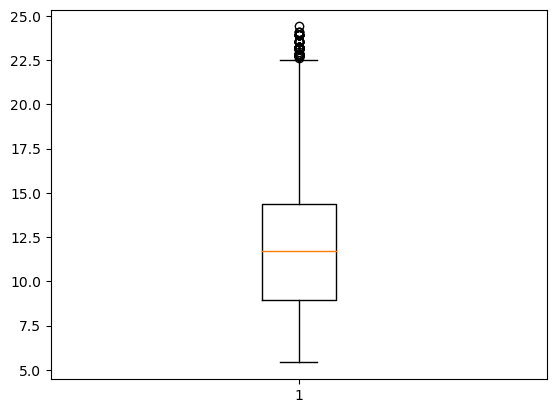

In [588]:
plt.boxplot(df.int_rate)

In [589]:
df['installment'].describe()

count    38577.000000
mean       322.466318
std        208.639215
min         15.690000
25%        165.740000
50%        277.860000
75%        425.550000
max       1305.190000
Name: installment, dtype: float64

{'whiskers': [<matplotlib.lines.Line2D at 0x2c81b7690>,
 'caps': [<matplotlib.lines.Line2D at 0x2c81c8990>,
 'boxes': [<matplotlib.lines.Line2D at 0x2c81b6d50>],
 'medians': [<matplotlib.lines.Line2D at 0x2c81c9910>],
 'fliers': [<matplotlib.lines.Line2D at 0x2c81ca090>],
 'means': []}

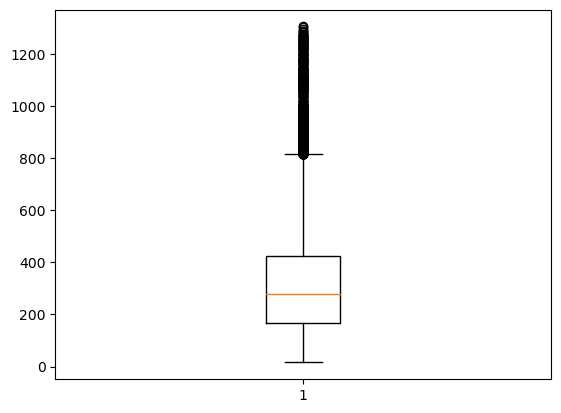

In [590]:
plt.boxplot(df.installment)

In [591]:
df.groupby('loan_status')['installment'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,5627.0,336.175006,217.051841,22.79,168.5550,293.87,457.840,1305.19
Fully Paid,32950.0,320.125232,207.081110,15.69,165.2825,275.65,420.735,1295.21


<Axes: xlabel='loan_status', ylabel='installment'>

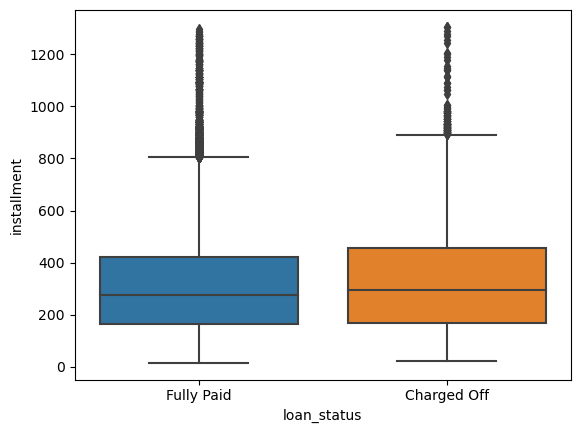

In [592]:
sns.boxplot(y="installment", x="loan_status",data=df)
# from this graph we see that number of installment for charged of is higher that fully paid

In [593]:
df.groupby('loan_status')['int_rate'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,5627.0,13.820432,3.654413,5.42,11.31,13.61,16.40,24.40
Fully Paid,32950.0,11.609761,3.599964,5.42,8.49,11.49,13.99,24.11


<Axes: xlabel='loan_status', ylabel='int_rate'>

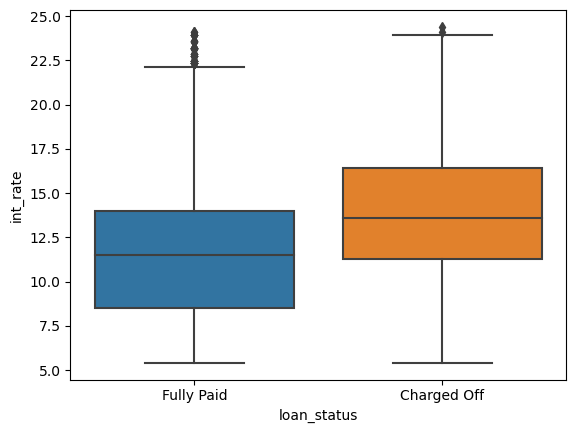

In [594]:
sns.boxplot(y="int_rate", x="loan_status",data=df)
# from this graph we see that charged-off have intrest rate higher

In [595]:
pd.crosstab(df['grade'], df['loan_status'])
# we see that person who has a good grade has good chance that they will have Fully paid status 

loan_status,Charged Off,Fully Paid
grade,,
A,602,9443
B,1425,10250
C,1347,6487
D,1118,3967
E,715,1948
F,319,657
G,101,198


<Axes: xlabel='grade'>

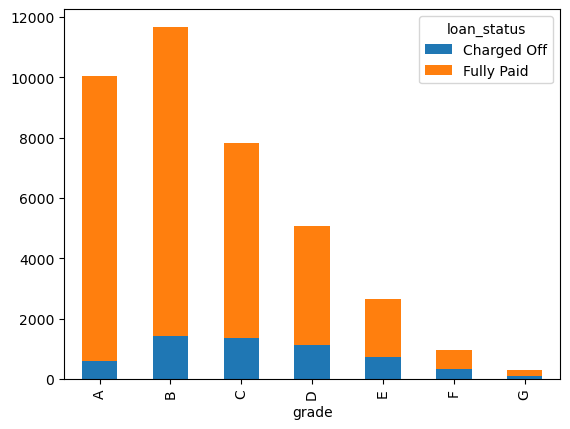

In [596]:
pd.crosstab(df['grade'],df['loan_status']).plot(kind="bar",stacked=True)

<Axes: xlabel='loan_status', ylabel='loan_amnt'>

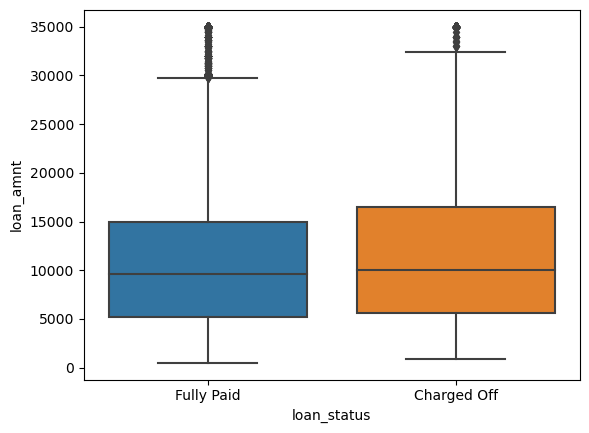

In [597]:
sns.boxplot(y="loan_amnt", x="loan_status",data=df)


In [598]:
df.groupby('loan_status')['loan_amnt'].describe()
# here we see that loan_amt for Charged_off is higher

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,5627.0,12104.385108,8085.732038,900.0,5600.0,10000.0,16500.0,35000.0
Fully Paid,32950.0,10866.455994,7199.629493,500.0,5200.0,9600.0,15000.0,35000.0


In [599]:
pd.crosstab(df['home_ownership'],df['loan_status'])


loan_status,Charged Off,Fully Paid
home_ownership,,
MORTGAGE,2327,14694
NONE,0,3
OTHER,18,80
OWN,443,2532
RENT,2839,15641


In [600]:
df.home_ownership.value_counts()

RENT        18480
MORTGAGE    17021
OWN          2975
OTHER          98
NONE            3
Name: home_ownership, dtype: int64

<Axes: xlabel='home_ownership'>

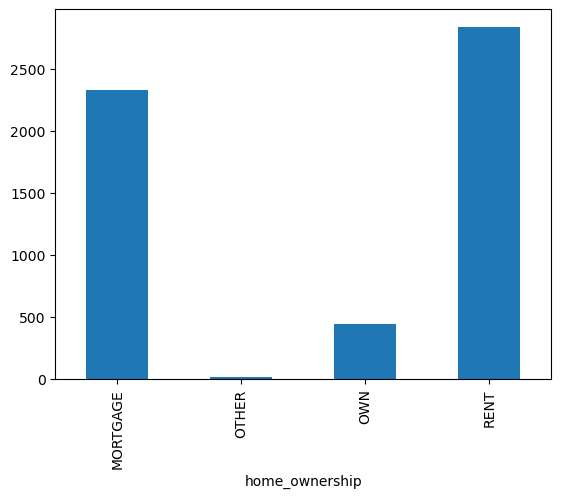

In [601]:
df.groupby('home_ownership')['loan_status'].value_counts().loc[:,'Charged Off'].plot(kind="bar",stacked=True)
# people with home ownership RENT or MORTGAGE are more defaulted 

<Axes: xlabel='home_ownership'>

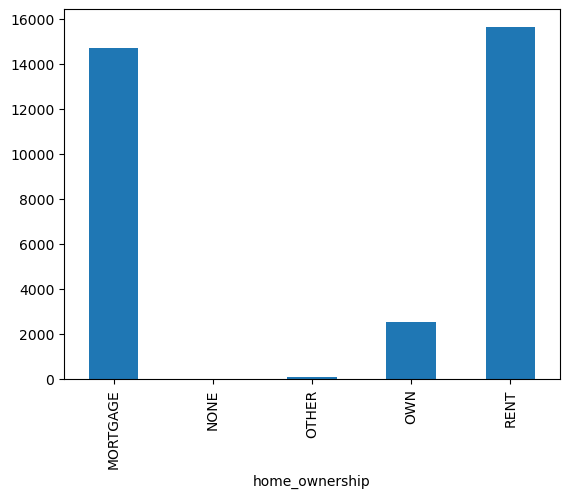

In [602]:
df.groupby('home_ownership')['loan_status'].value_counts().loc[:,'Fully Paid'].plot(kind="bar",stacked=True)

In [603]:
# with home_ownership we can't identity much

<Axes: xlabel='term'>

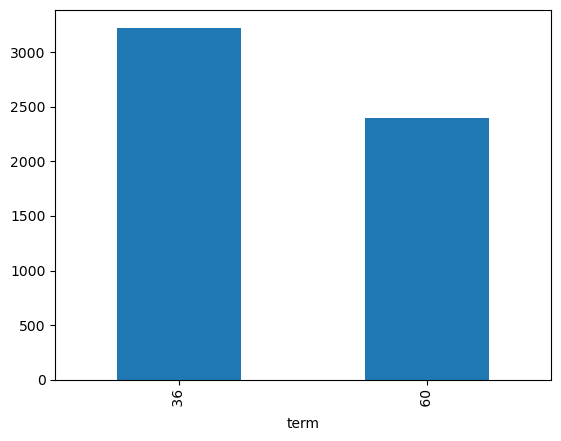

In [604]:
df.groupby('term')['loan_status'].value_counts().loc[:,'Charged Off'].plot(kind="bar",stacked=True)
# from this we can see that person who has term, 36 months are more defaulted

In [605]:
pd.crosstab(df['term'],df['loan_status'])

loan_status,Charged Off,Fully Paid
term,,
36,3227,25869
60,2400,7081


In [606]:
df1 = df[df.loan_status=="Charged Off"]

In [607]:
df1.verification_status.value_counts()

Not Verified       2142
Verified           2051
Source Verified    1434
Name: verification_status, dtype: int64

<Axes: xlabel='verification_status'>

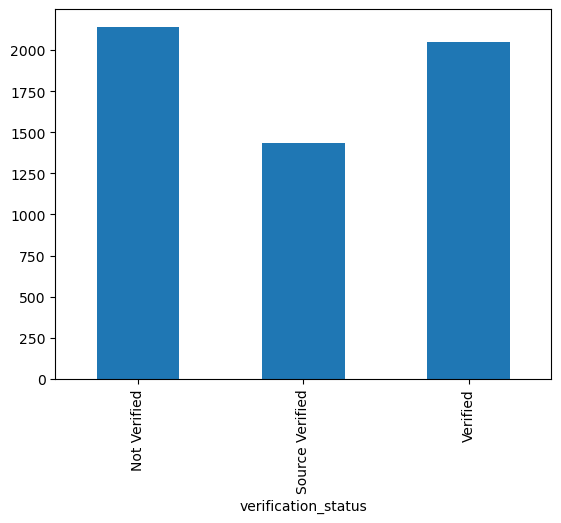

In [608]:
df.groupby('verification_status')['loan_status'].value_counts().loc[:,'Charged Off'].plot(kind="bar",stacked=True)
# here we see that Not Verified and Verified both varification status can be defaulted

In [609]:
df.annual_inc.describe()

count    3.857700e+04
mean     6.877797e+04
std      6.421868e+04
min      4.000000e+03
25%      4.000000e+04
50%      5.886800e+04
75%      8.200000e+04
max      6.000000e+06
Name: annual_inc, dtype: float64

In [610]:
# let's dive annual_inc in bucket
df.annual_inc.sort_values()

35501       4000.0
29283       4080.0
37709       4200.0
30726       4200.0
36639       4800.0
           ...    
7247     1782000.0
23551    1900000.0
39089    2039784.0
29639    3900000.0
30107    6000000.0
Name: annual_inc, Length: 38577, dtype: float64

In [611]:
df.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,...,revol_bal,revol_util,total_acc,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,last_pymnt_amnt,issue_year,issue_month
0,5000,5000,4975.0,36,10.65,162.87,B,B2,10+ years,RENT,...,13648.0,83.70%,9,5863.155187,5833.84,5000.00,863.16,171.62,2011,Dec
1,2500,2500,2500.0,60,15.27,59.83,C,C4,< 1 year,RENT,...,1687.0,9.40%,4,1008.710000,1008.71,456.46,435.17,119.66,2011,Dec
2,2400,2400,2400.0,36,15.96,84.33,C,C5,10+ years,RENT,...,2956.0,98.50%,10,3005.666844,3005.67,2400.00,605.67,649.91,2011,Dec
3,10000,10000,10000.0,36,13.49,339.31,C,C1,10+ years,RENT,...,5598.0,21%,37,12231.890000,12231.89,10000.00,2214.92,357.48,2011,Dec
5,5000,5000,5000.0,36,7.90,156.46,A,A4,3 years,RENT,...,7963.0,28.30%,12,5632.210000,5632.21,5000.00,632.21,161.03,2011,Dec


/var/folders/qc/gk_jrz1s3ln3dwkfp1yhtc3h0000gq/T/ipykernel_64048/2904222733.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.annual_inc)


<Axes: xlabel='annual_inc', ylabel='Density'>

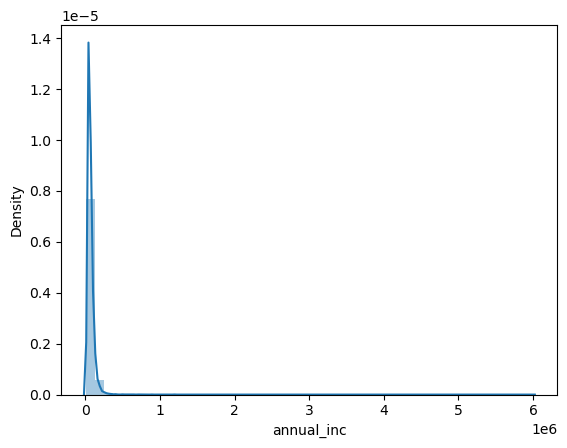

In [612]:
sns.distplot(df.annual_inc)
# from below distibution plot we can see that there is outlier

{'whiskers': [<matplotlib.lines.Line2D at 0x2c86e3c50>,
 'caps': [<matplotlib.lines.Line2D at 0x2c86f0cd0>,
 'boxes': [<matplotlib.lines.Line2D at 0x2c86c0110>],
 'medians': [<matplotlib.lines.Line2D at 0x2c86f1dd0>],
 'fliers': [<matplotlib.lines.Line2D at 0x2c86c34d0>],
 'means': []}

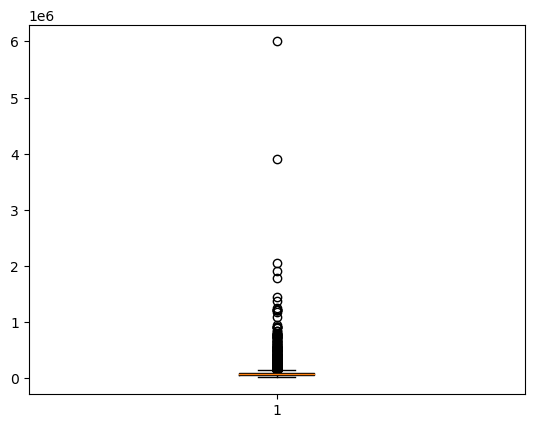

In [613]:
plt.boxplot(df.annual_inc)

In [614]:
# remove outliers from annual_inc
df = df[(df.annual_inc < 1000000)]

<Axes: xlabel='loan_status', ylabel='annual_inc'>

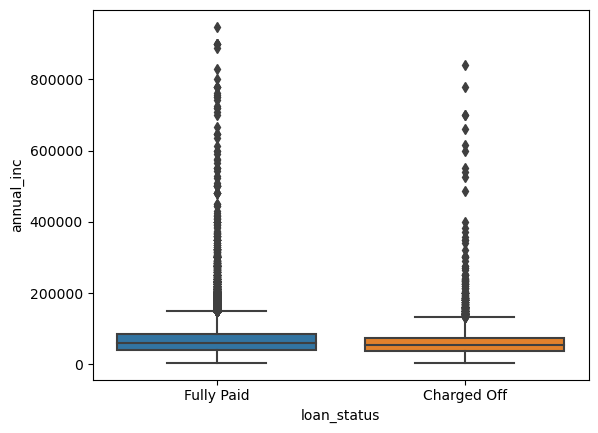

In [615]:
sns.boxplot(y="annual_inc", x="loan_status",data=df)


In [616]:
df.groupby('loan_status')['annual_inc'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,5626.0,62216.211525,45079.747234,4080.0,37000.0,53000.0,75000.0,840000.0
Fully Paid,32937.0,69116.486039,47740.334581,4000.0,41056.0,60000.0,84000.0,948000.0


In [617]:
# Bucketing Annual Income
def bucket_annual_inc(column):
    if column <= 40000:
        return '0 - 40k' #25% quartile
    elif (column >40000) and (column <= 55000):
        return '40k - 55k'    
    elif (column >55000) and (column <= 70000):
        return '55k to 70k'
    elif (column >70000) and (column <= 85000):
        return '70k to 85k'
    else:
        return '85k - above' # approx 75% quartile 

df['annual_inc_b'] = df.apply(lambda x: bucket_annual_inc(x['annual_inc']), axis = 1)

<Axes: xlabel='annual_inc_b'>

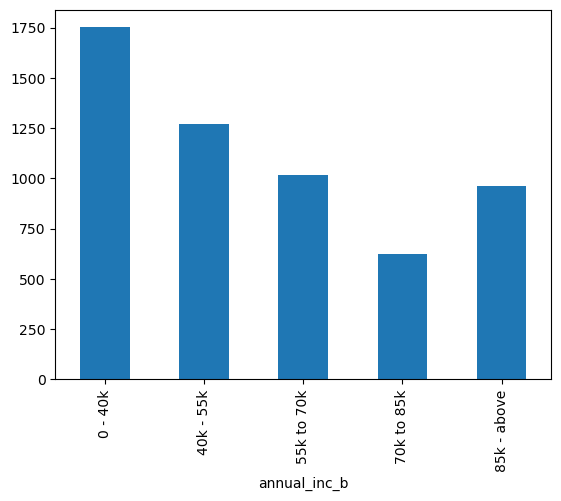

In [618]:
df.groupby('annual_inc_b')['loan_status'].value_counts().loc[:,'Charged Off'].plot(kind="bar",stacked=True)
# from this we see that lower the annual income higher the Charged-off

In [619]:
df.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,...,revol_util,total_acc,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,last_pymnt_amnt,issue_year,issue_month,annual_inc_b
0,5000,5000,4975.0,36,10.65,162.87,B,B2,10+ years,RENT,...,83.70%,9,5863.155187,5833.84,5000.00,863.16,171.62,2011,Dec,0 - 40k
1,2500,2500,2500.0,60,15.27,59.83,C,C4,< 1 year,RENT,...,9.40%,4,1008.710000,1008.71,456.46,435.17,119.66,2011,Dec,0 - 40k
2,2400,2400,2400.0,36,15.96,84.33,C,C5,10+ years,RENT,...,98.50%,10,3005.666844,3005.67,2400.00,605.67,649.91,2011,Dec,0 - 40k
3,10000,10000,10000.0,36,13.49,339.31,C,C1,10+ years,RENT,...,21%,37,12231.890000,12231.89,10000.00,2214.92,357.48,2011,Dec,40k - 55k
5,5000,5000,5000.0,36,7.90,156.46,A,A4,3 years,RENT,...,28.30%,12,5632.210000,5632.21,5000.00,632.21,161.03,2011,Dec,0 - 40k


<Axes: xlabel='issue_year'>

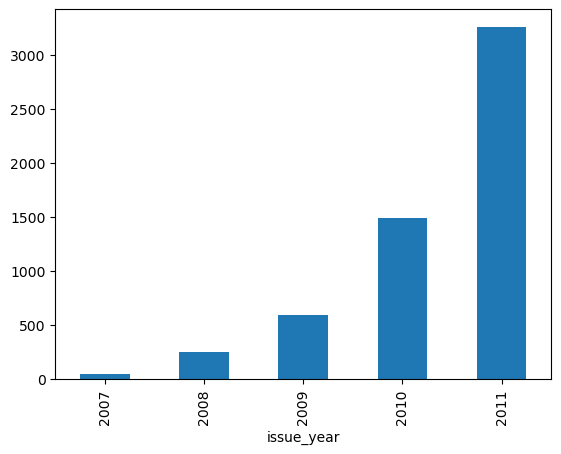

In [642]:
df.groupby('issue_year')['loan_status'].value_counts().loc[:,'Charged Off'].plot(kind="bar",stacked=True)
# here we can notice that Charged-off suddenly increased very much in 2011

<Axes: xlabel='issue_month'>

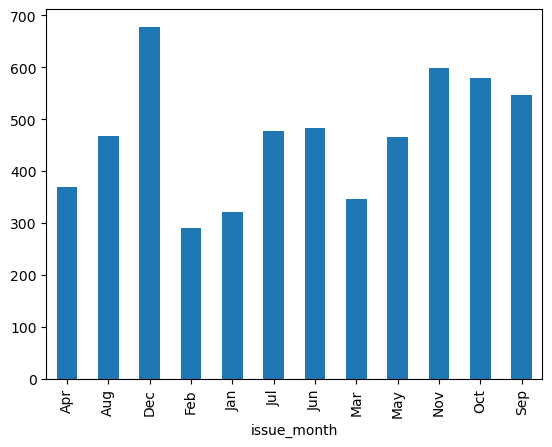

In [621]:
df.groupby('issue_month')['loan_status'].value_counts().loc[:,'Charged Off'].plot(kind="bar",stacked=True)
# here we can notice that Charged-off suddenly increased very much in month of Dec

In [622]:
# debt to income ratio
df.dti.describe()

count    38386.000000
mean        13.337772
std          6.624348
min          0.010000
25%          8.210000
50%         13.410000
75%         18.580000
max         29.990000
Name: dti, dtype: float64

In [623]:
df.groupby('loan_status')['dti'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,5597.0,14.071771,6.524611,0.01,9.15,14.34,19.30,29.85
Fully Paid,32789.0,13.212480,6.633211,0.01,8.06,13.24,18.43,29.99


<Axes: xlabel='loan_status', ylabel='dti'>

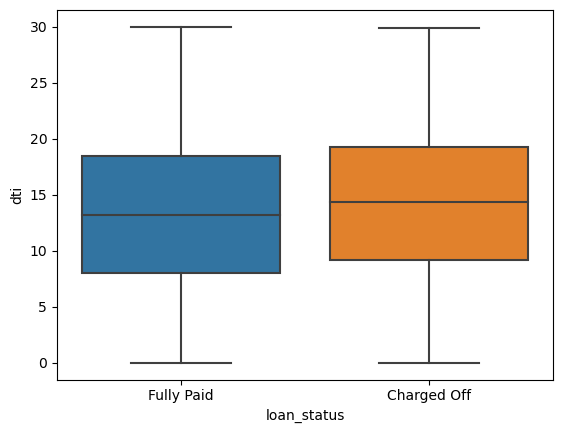

In [624]:
sns.boxplot(x="loan_status", y="dti",data=df)
# from this we can see that higher the dti higher the Charged-off

In [625]:
df['loan_amnt'].describe()

count    38563.000000
mean     11047.201981
std       7348.603711
min        500.000000
25%       5300.000000
50%       9600.000000
75%      15000.000000
max      35000.000000
Name: loan_amnt, dtype: float64

{'whiskers': [<matplotlib.lines.Line2D at 0x2c88ca690>,
 'caps': [<matplotlib.lines.Line2D at 0x2c88cbc50>,
 'boxes': [<matplotlib.lines.Line2D at 0x2c88c9b10>],
 'medians': [<matplotlib.lines.Line2D at 0x2c88d52d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x2c88d5d50>],
 'means': []}

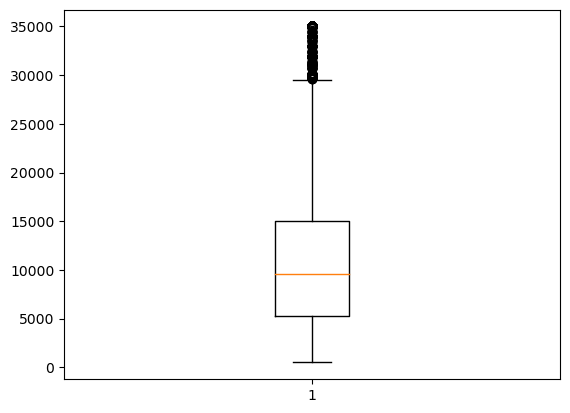

In [626]:
plt.boxplot(df.loan_amnt)

In [627]:
# Bucketting Loan Amount
def bucket_loan_amnt(column):
    if column <= 5000:
        return '0 - 5K'  # 25% quartile
    elif (column >5000) and (column <= 10000):
        return '5K - 10K'      
    elif (column >10000) and (column <= 15000):
        return '10K - 15K'  
    else:
        return '15K - above' # 75% quartile
    
df['loan_amnt_b'] = df.apply(lambda x : bucket_loan_amnt(x['loan_amnt']), axis = 1)

In [628]:
df.loan_amnt_b.head(5)

0      0 - 5K
1      0 - 5K
2      0 - 5K
3    5K - 10K
5      0 - 5K
Name: loan_amnt_b, dtype: object

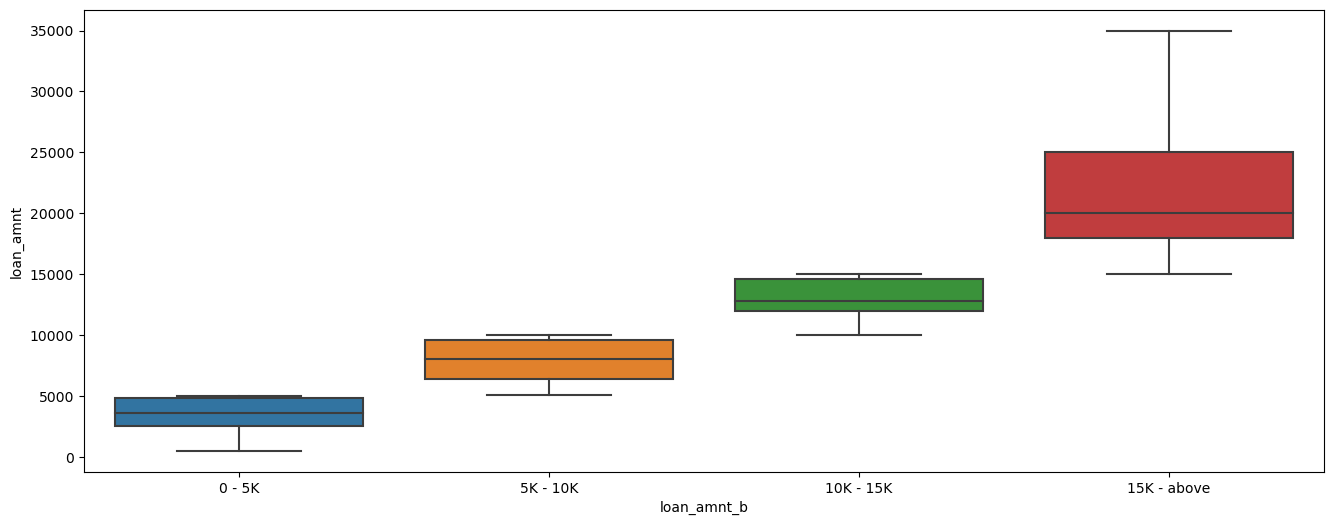

In [629]:
plt.figure(figsize=(16,6))
sns.boxplot(y=df.loan_amnt,x=df.loan_amnt_b)
plt.show()

<Axes: xlabel='loan_amnt_b'>

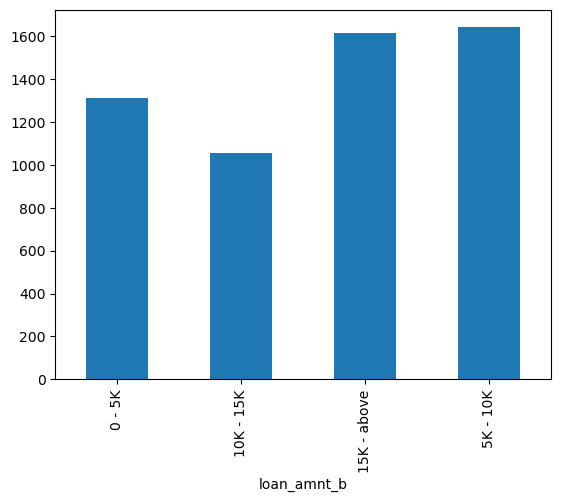

In [630]:
df.groupby('loan_amnt_b')['loan_status'].value_counts().loc[:,'Charged Off'].plot(kind="bar",stacked=True)

In [631]:
df['dti'].describe()

count    38386.000000
mean        13.337772
std          6.624348
min          0.010000
25%          8.210000
50%         13.410000
75%         18.580000
max         29.990000
Name: dti, dtype: float64

In [632]:
# Bucketing dti
#since our 25th percentile value is at 8, we bucket accordingly
def bucket_dti(column):
    if column <= 8:
        return 'Very Low' # 25% quartile
    elif (column >8) and (column <= 12):
        return 'Low'    
    elif (column >12) and (column <= 16):
        return 'Moderate'
    elif (column >16) and (column <= 20):
        return 'High'
    else:
        return 'Very High' # 75% quartile

df['dti_b'] = df.apply(lambda x : bucket_dti(x['dti']), axis = 1)

In [633]:
df.dti_b.head(10)

0     Very High
1      Very Low
2           Low
3          High
5           Low
6     Very High
7      Very Low
8      Very Low
9          High
10         High
Name: dti_b, dtype: object

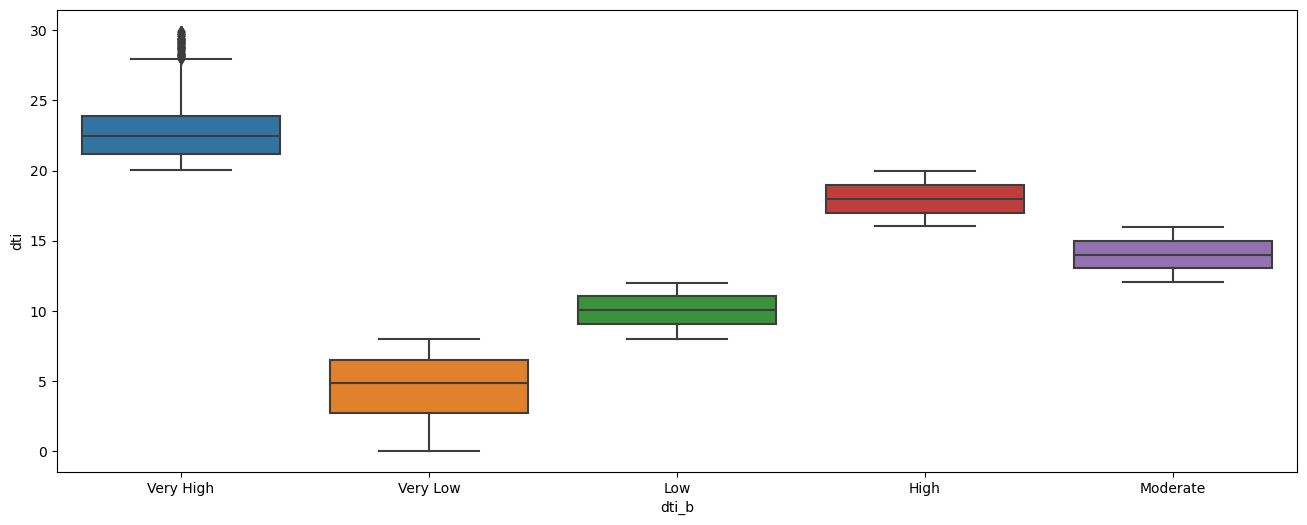

In [634]:
plt.figure(figsize=(16,6))
sns.boxplot(y=df.dti,x=df.dti_b)
plt.show()

<Axes: xlabel='dti_b'>

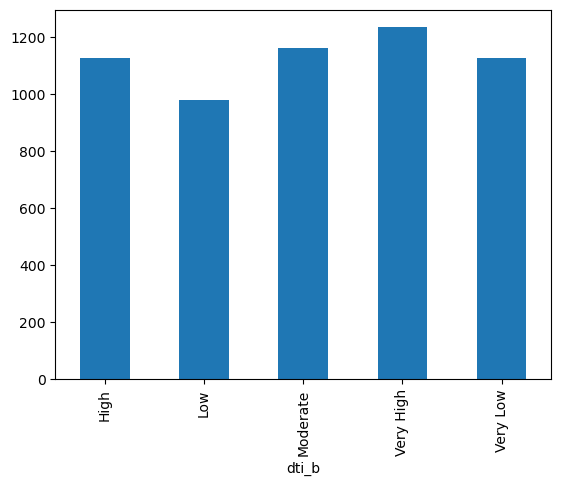

In [635]:
df.groupby('dti_b')['loan_status'].value_counts().loc[:,'Charged Off'].plot(kind="bar",stacked=True)

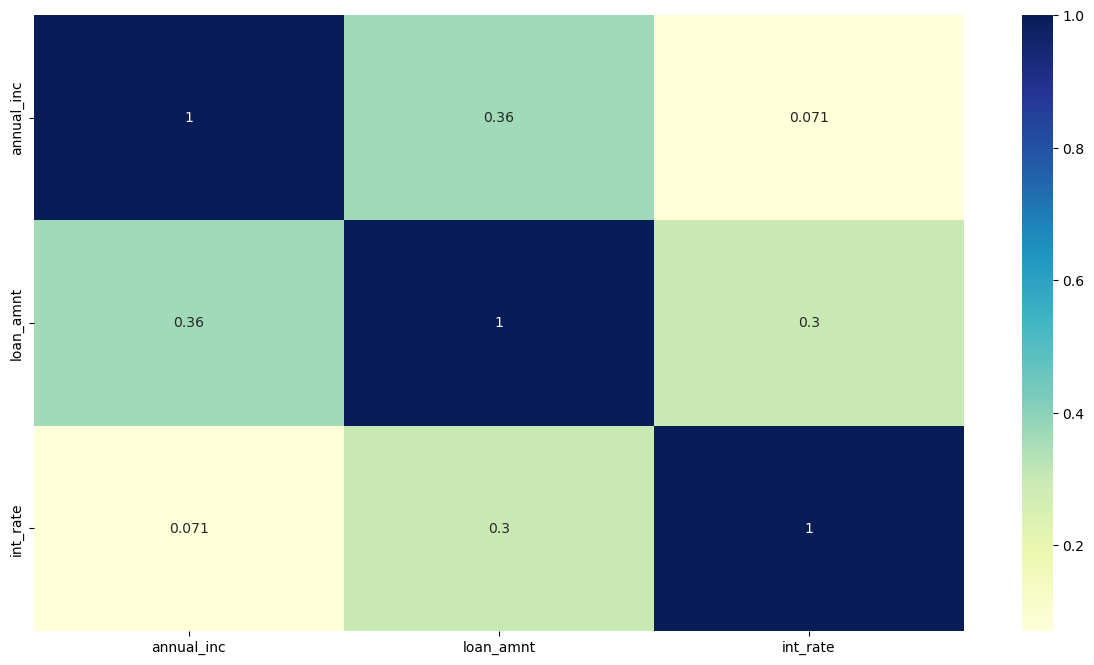

In [636]:
# Identifying key correlations
corr = df.loc[:, [ 'annual_inc','loan_amnt','int_rate']].corr()
plt.figure(figsize = (15,8))
sns.heatmap(corr, annot = True, cmap='YlGnBu')
plt.show()

In [637]:
# loan amount high intrest rate high
# loan amount high anuual income is good


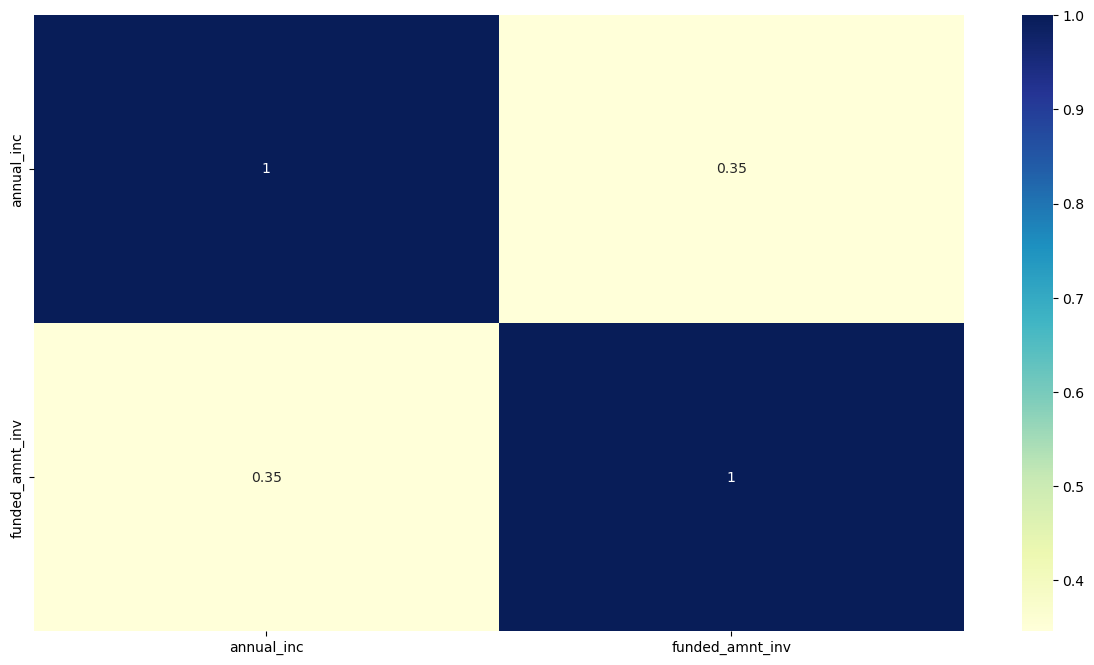

In [654]:
corr = df.loc[:, [ 'annual_inc','funded_amnt_inv']].corr()
plt.figure(figsize = (15,8))
sns.heatmap(corr, annot = True, cmap='YlGnBu')
plt.show()

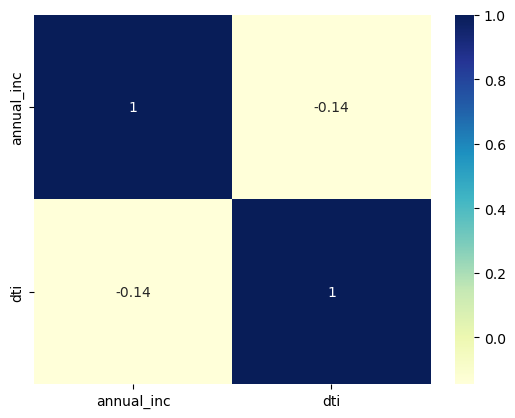

<Figure size 1500x800 with 0 Axes>

In [655]:
corr = df.loc[:,["annual_inc","dti"]].corr()
sns.heatmap(corr, annot = True, cmap='YlGnBu')
plt.figure(figsize = (15,8))
plt.show()

In [639]:
# conclusion

# Charged-off highly depends on factors like int_rate, grade, loan_amnt, term, annual_inc, issue_year, dti .
# more these factor higher the chances of Defaulted